# Project Phase 4
### Samantha Rubin, Hanwen Lin, Liz Espinoza, and Hanna Kang

## Introduction
The coronavirus disease has resulted in an ongoing pandemic affecting over 200 countries and territories. As of April 2021, there have been over 147 million cases and 3 million deaths worldwide. Several factors such as age groups, testing rates and airport traffic have statistically proven to affect trends in positive coronavirus cases in many countries. However, given that the coronavirus is rapidly changing, there is a lack of studied statistical relationships between high rates in COVID cases and economic indicators such as GDP per capita, Gini index, and employment rates. Due to the fact that the economic performance of a country oftentimes indicates its ability to provide adequate living standards and health resources, poorer countries frequently lack proper sanitation, prevention or health programs that work to combat the threat of diseases. Because of these considerations, we hypothesize that countries with poorer economic performances in terms of GDP, Gini Index, and unemployment rates would experience higher levels of positive COVID cases. 
To address these concerns, we studied the relationships between factors such as wealth inequality (gini index) and high rates of positive COVID cases in relation to the total population and COVID deaths across different countries. In efforts to gain a further understanding, we also presented an analysis of the correlation between GDP per capita and high rates of positive COVID cases throughout countries. We ultimately hoped to discover the potential trend between the ratio of positive case results to COVID deaths and a country’s GDP and/or Gini index. Through the use of multivariate regressions, linear regressions and factorial ANOVA statistical tests, we were able to explore potential trends between these economic indicators and coronavirus cases across affected countries. 
The outcomes of our study showed, surprisingly, that countries with higher GDPs were more likely to have higher COVID rates, and that when trying to predict the cumulative positive cases of a country, the most likely and probable way would be to use GDP per capita, Gini index, unemployment rates, and population density.


## Data Description
There is not a lot of information on the relationship between wealth inequality (quantified by the Gini index), GDP per capita and other factors, and high rates of positive COVID-19 cases and/or COVID-19 deaths across different countries. This is especially the case as COVID-19 is ongoing and trends are rapidly changing. To address this, we have chosen to analyze six datasets. The first dataset contains data from the Joint Research Centre (JRC), which was made to further understand COVID-19, to predict any potential impacts, and to support future planning. Included columns are cumulative positive and cumulative recovered COVID-19 cases, as well as cumulative deceased and the number of hospitalized and intensive care patients. Rows in this dataset include the names of countries and their respective country codes. 
The other five datasets are simpler, only having data of country names and codes, and their respective Gini indexes, GDP per capita, population, population density, and unemployment rates. These were created to look at all of the Gini indexes, GDP per capita, population, population density, and unemployment rates of countries. We will only be analyzing countries that have all of these values, and that are also on the COVID-19 dataset, matching by country code. 
Analysis on these datasets will help to find potential relationships between COVID-19 cases and factors such as Gini index, GDP, population, population density, and unemployment rate.   Through this, we hope to determine how the wealth of a country changes how it has been affected by COVID-19.


## Pregistration Statement
*Analysis 1:* We will use a multivariable regression model that uses Gini Index, GDP per capita, population density, and unemployment rates as inputs to predict cumulative positive COVID cases and cumulative COVID deaths.

*Analysis 2:* We will calculate a factorial ANOVA using the cells described below.  This will help determine if the difference in mean of covid data in countries with different economic indices is statistically significant. 

|             | Low GDP | Medium GDP | High GDP  |
|-------------|---------|------------|-----------|
| Low Gini    | 1       | 2          | 3         |
| Medium Gini | 4       | 5          | 6         |
| High Gini   | 7       | 8          | 9         |



## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

covid_data = pd.read_csv('covid_data.csv')
anova_df=pd.read_csv('anova_df.csv')

#### Linear Models:
Below are several models we use to try predicting positive COVID cases per capita, COVID deaths per capita, and the ratio of COVID deaths to COVID positives based on different predictor variables including GDP per capita, Gini index, unemployment rate and population density.

#### 1: Predict cumulative positive COVID cases per capita (Y) based on GDP per capita (X) [Linear Regression]

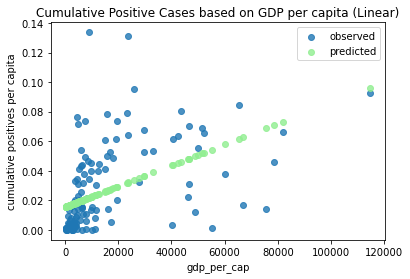

r squared: 0.242


In [17]:
pos_gdp_regressor = LinearRegression()

pos_gdp_reshapeX = np.reshape(covid_data[['gdp_per_cap']], (-1, 1))


pos_gdp_regressor.fit(pos_gdp_reshapeX, covid_data['cpos_norm'])

pos_gdp_pred = pos_gdp_regressor.predict(pos_gdp_reshapeX)

plt.scatter(pos_gdp_reshapeX, covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(pos_gdp_reshapeX, pos_gdp_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on GDP per capita (Linear)')
plt.xlabel('gdp_per_cap')
plt.ylabel('cumulative positives per capita')
plt.legend(['observed', 'predicted'])

plt.show()
print("r squared: {:.3f}".format(pos_gdp_regressor.score(pos_gdp_reshapeX, covid_data['cpos_norm'])))

#### 2: Predict cumulative positive COVID cases per capita (Y) based on Gini index (X) [Linear Regression]

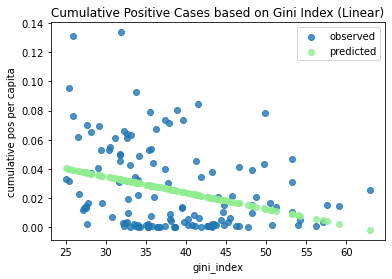

r squared: 0.10


In [6]:
pos_gini_regressor = LinearRegression()

pos_gini_reshapeX = np.reshape(covid_data[['gini_index']], (-1, 1))


pos_gini_regressor.fit(pos_gini_reshapeX, covid_data['cpos_norm'])

pos_gini_pred = pos_gini_regressor.predict(pos_gini_reshapeX)

plt.scatter(pos_gini_reshapeX, covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(pos_gini_reshapeX, pos_gini_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on Gini Index (Linear)')
plt.xlabel('gini_index')
plt.ylabel('cumulative pos per capita')
plt.legend(['observed', 'predicted'])

plt.show()
print("r squared: {:.2f}".format(pos_gini_regressor.score(pos_gini_reshapeX, covid_data['cpos_norm'])))

#### 3: Predict cumulative positive COVID cases per capita (Y) based on population density (X) [Linear Regression]

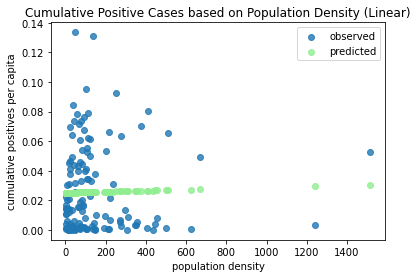

r squared: 0.0006


In [8]:
pos_den_regressor = LinearRegression()

pos_den_regressor.fit(covid_data[['pop_density']], covid_data['cpos_norm'])

pos_den_pred = pos_den_regressor.predict(covid_data[['pop_density']])

%matplotlib inline
plt.scatter(covid_data['pop_density'], covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(covid_data['pop_density'], pos_den_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on Population Density (Linear)')
plt.xlabel('population density')
plt.ylabel('cumulative positives per capita')
plt.legend(['observed', 'predicted'])
plt.show()
print("r squared: {:.4f}".format(pos_den_regressor.score(covid_data[['pop_density']], covid_data['cpos_norm'])))

#### 4: Predict cumulative positive COVID cases per capita (Y) based on unemployment rates (X) [Linear Regression]

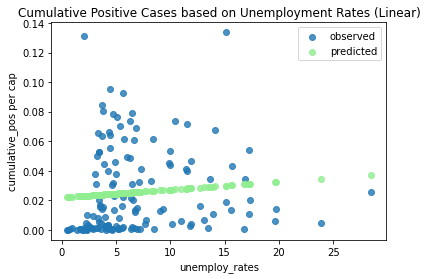

r squared: 0.0083


In [9]:
pos_rates_regressor = LinearRegression()

pos_rates_regressor.fit(covid_data[['unemploy_rates']], covid_data['cpos_norm'])

pos_rates_pred = pos_rates_regressor.predict(covid_data[['unemploy_rates']])

plt.scatter(covid_data[['unemploy_rates']], covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(covid_data[['unemploy_rates']], pos_rates_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on Unemployment Rates (Linear)')
plt.xlabel('unemploy_rates')
plt.ylabel('cumulative_pos per cap')
plt.legend(['observed', 'predicted'])

plt.show()
print("r squared: {:.4f}".format(pos_rates_regressor.score(covid_data[['unemploy_rates']], covid_data['cpos_norm'])))

#### 5: Using GDP per capita, Gini index, population density, and unemployment rates to predict the cumulative positive COVID cases per capita [Multivariable Regression]

In [11]:
multi_model = LinearRegression()
multi_model.fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cpos_norm'])
print('gdp_per_cap coefficient: {:.3E}'.format(multi_model.coef_[0]))
print('gini_index coefficient: {:.3E}'.format(multi_model.coef_[1]))
print('population density coefficient: {:.3E}'.format(multi_model.coef_[2]))
print('unemployment rates coefficient: {:.3E}'.format(multi_model.coef_[3]))

score = multi_model.score(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cpos_norm'])
print('r squared: {:.4f}'.format(score))

gdp_per_cap coefficient: 6.376E-07
gini_index coefficient: -7.082E-04
population density coefficient: -4.363E-07
unemployment rates coefficient: 1.140E-03
r squared: 0.2982


#### 6: Using GDP per capita, Gini index, population density, and unemployment rates to predict COVID deaths per capita [Multivariable Regression]

In [13]:
multi_model_dec = LinearRegression()
multi_model_dec.fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cdec_norm'])
print('gdp_per_cap coefficient: {:.3E}'.format(multi_model_dec.coef_[0]))
print('gini_index coefficient: {:.3E}'.format(multi_model_dec.coef_[1]))
print('population density coefficient: {:.3E}'.format(multi_model_dec.coef_[2]))
print('unemployment rates coefficient: {:.3E}'.format(multi_model_dec.coef_[3]))

score_dec = multi_model_dec.score(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cdec_norm'])
print('r squared: {:.4f}'.format(score_dec))

gdp_per_cap coefficient: 1.026E-08
gini_index coefficient: -1.194E-05
population density coefficient: -1.663E-07
unemployment rates coefficient: 1.954E-05
r squared: 0.1914


#### 7: Using GDP per capita, Gini index, population density, and unemployment rates to predict ratio of COVID deaths to COVID positives [Multivariable Regression]

In [15]:
multi_model_ratio = LinearRegression()
multi_model_ratio.fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['dec_pos_ratio'])


print('gdp_per_cap coefficient: {:.3E}'.format(multi_model_ratio.coef_[0]))
print('gini_index coefficient: {:.3E}'.format(multi_model_ratio.coef_[1]))
print('population density coefficient: {:.3E}'.format(multi_model_ratio.coef_[2]))
print('unemployment rates coefficient: {:.3E}'.format(multi_model_ratio.coef_[3]))

score_ratio = multi_model_ratio.score(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['dec_pos_ratio'])
print('r squared: {:.4f}'.format(score_ratio))

gdp_per_cap coefficient: -3.696E-08
gini_index coefficient: 1.007E-04
population density coefficient: -5.800E-06
unemployment rates coefficient: 6.896E-05
r squared: 0.0244


#### ANOVA Test:

We will perform a two-way ANOVA (“analysis of variance”) to determine __how the GDP per capita and gini index of a country affect cumulative COVID cases per capita, and if there are any interaction effects between GDP per capita and gini index__.

In [5]:
# importing libraries to help with ANOVA
import statsmodels.api as sm
# performing our ANOVA analysis:
from statsmodels.formula.api import ols
#reference:https://www.statology.org/two-way-anova-python/
model = ols('cpos_norm ~ C(gdp_group) + C(gini_group) + C(gdp_group):C(gini_group)', data=anova_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(gdp_group),0.032779,2.0,32.692245,3.657800e-12
C(gini_group),0.004625,2.0,4.612961,1.165647e-02
C(gdp_group):C(gini_group),0.002108,4.0,1.051422,3.835344e-01
Residual,0.063167,126.0,NaN,NaN


Setting the significance level to 0.05 (p<0.05), we compare the PR(>F) value for each independent variable to the significance level:

Main effect GDP per capita: F(2,126) = 32.69, p<0.05. Since the p-value of gdp_group (3.658e-12) is much lower than 0.05, we can conclude that GDP per capita has a statistically significant effect on a country's cumulative positive rate per capita.

Main effect Gini index: F(2,126) = 4.61, p<0.05. Since the p-value of gini_group (0.012) is also lower than 0.05, we can also conclude that gini index has a statistically significant effect on a country's cumulative positive rate per capita. 

Interaction effect: F(4,126) = 1.05, p>0.05. Since the p-value of interaction (3.835) is higher than 0.05, we can conclude that there is no significant interaction effect on a country's cumulative positive rate per capita. By interaction effect, we mean the effect of one independent variable depends on the state of the other independent variable (e.g. rich sunlight may have a more powerful effect on plant growth if the water is sufficient, as opposed to insufficient). Here, such interaction between GDP per capita and gini index does not exist.

## Evaluation of Significance (Linear Models)

#### Train test split
Here we use train_test_split to split our data into a "train" portion (80%) and a "test" portion (the remaining 20%).  We fit a linear model to the train data, and see how well it performs comparatively on the test data.  This tests whether our model is overfitted to our data.  

In [46]:
n_tts = 100
test_scores=[]
train_scores=[]

for i in range(n_tts):
    train_gdp, test_gdp, train_pos, test_pos = train_test_split(covid_data["gdp_per_cap"]
                                                            , covid_data['cpos_norm'], test_size = 0.20)
    regressor_gdp = LinearRegression().fit(np.array(train_gdp).reshape(-1,1), train_pos)
    train_scores.append(regressor_gdp.score(np.array(train_gdp).reshape(-1,1), train_pos))
    
    #how well can we predict the test set?
    accuracy_test = regressor_gdp.score(np.array(test_gdp).reshape(-1,1), test_pos)
    test_scores.append(accuracy_test)

abs_difference=[]
for i in range(n_tts):
    abs_difference.append(abs(train_scores[i]-test_scores[i]))

avg_diff = np.mean(abs_difference)
avg_test_score = np.mean(test_scores)
avg_train_score = np.mean(train_scores)

print("Average r squared for train datasets: {:.3f}\nAverage r squared for test datasets: {:.3f}\nAverage difference in test and train scores: {:.3f}".format(avg_train_score,avg_test_score,avg_diff))

Average r squared for train datasets: 0.245
Average r squared for test datasets: 0.195
Average difference in test and train scores: 0.160


In [52]:
#Train test split for multivariable regression: predicting cpos_norm from GDP per capita,
#Gini index, population density, and unemployment rates
n_tts2 = 100
multi_test_scores=[]
multi_train_scores=[]

for i in range(n_tts2):
    train_multi, test_multi = train_test_split(covid_data, test_size = 0.20)
    regressor_multi = LinearRegression().fit(train_multi[['gdp_per_cap', 'gini_index'
                                                     , 'pop_density', 'unemploy_rates']], train_multi['cpos_norm'])
    multi_train_scores.append(regressor_multi.score(train_multi[['gdp_per_cap', 'gini_index'
                                                     , 'pop_density', 'unemploy_rates']], train_multi['cpos_norm']))
    #testing
    multi_test_scores.append(regressor_multi.score(test_multi[['gdp_per_cap', 'gini_index', 'pop_density', 'unemploy_rates']],test_multi['cpos_norm']))

m_abs_difference=[]
for i in range(n_tts2):
    m_abs_difference.append(abs(multi_train_scores[i]-multi_test_scores[i]))

avg_diff2 = np.mean(m_abs_difference)
avg_test_score2 = np.mean(multi_test_scores)
avg_train_score2 = np.mean(multi_train_scores)

print("Average r squared for train datasets: {:.3f}\nAverage r squared for test datasets: {:.3f}\nAverage difference in test and train scores: {:.3f}".format(avg_train_score2,avg_test_score2,avg_diff2))

Average r squared for train datasets: 0.304
Average r squared for test datasets: 0.194
Average difference in test and train scores: 0.213


## Permutation test
Here, we perform a permutation test for analysis 5: Using GDP per capita, gini index, population density, and unemployment rates to predict the cumulative positive COVID cases per capita. The purpose here is to test the null hypothesis, the chance that the trend we found is a result of random chance.  

In [83]:
# creating a function to randomize outputs
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

n_perm = 10000
gdp_perm_coefs = []
gini_perm_coefs = []
pop_perm_coefs = []
rates_perm_coefs = []

for i in range(n_perm):
    perm = permute(np.array(covid_data[["cpos_norm"]]))
    perm_model=LinearRegression().fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density', 'unemploy_rates']],perm)
    gdp_perm_coefs.append(perm_model.coef_[0,0])
    gini_perm_coefs.append(perm_model.coef_[0,1])
    pop_perm_coefs.append(perm_model.coef_[0,2])
    rates_perm_coefs.append(perm_model.coef_[0,3])

Actual GDP coefficient: 6.376E-07
Percentage of coefficients equal to or greater than this: 0.0000%


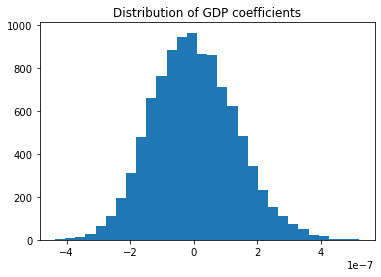

In [84]:
#figuring out percent chance that gdp coefficient would result from random chance
count_gdp=0
for i in gdp_perm_coefs:
    if i>=6.376*10**-7:
        count_gdp+=1
perc_gdp=count_gdp/n_perm * 100

        
plt.hist(gdp_perm_coefs, bins=30);
plt.title("Distribution of GDP coefficients");
print("Actual GDP coefficient: 6.376E-07\nPercentage of coefficients equal to or greater than this: {:.4f}%".format(perc_gdp))

Actual gini coefficient: -7.082E-04
Percentage of coefficients equal to or less than this: 1.62%


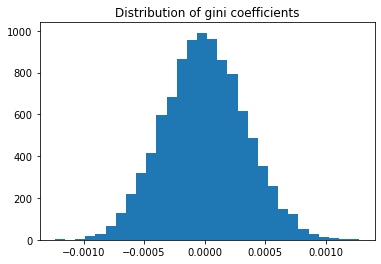

In [94]:
#figuring out percent chance that gini coefficient would result from random chance
count_gini=0
for i in gini_perm_coefs:
    if i<=-7.082*10**-4:
        count_gini+=1
perc_gini=count_gini/n_perm * 100

plt.hist(gini_perm_coefs, bins=30);
plt.title("Distribution of gini coefficients");
print("Actual gini coefficient: -7.082E-04\nPercentage of coefficients equal to or less than this: {:.2f}%".format(perc_gini))

Actual population density coefficient: -4.363E-07
Percentage of coefficients equal to or less than this: 51.37%


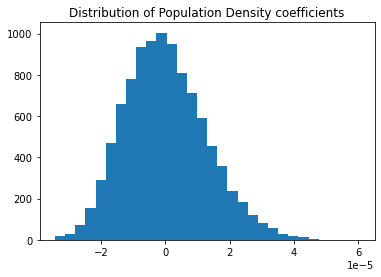

In [92]:
#figuring out percent chance that population density coefficient would result from random chance
count_pop=0
for i in pop_perm_coefs:
    if i<=-4.363*10**-7:
        count_pop+=1
perc_pop=count_pop/n_perm * 100

plt.hist(pop_perm_coefs, bins=30);
plt.title("Distribution of Population Density coefficients");
print("Actual population density coefficient: -4.363E-07\nPercentage of coefficients equal to or less than this: {:.2f}%".format(perc_pop))

Actual Unemployment Rate coefficient: 1.140E-03
Percentage of coefficients equal to or greater than this: 1.97%


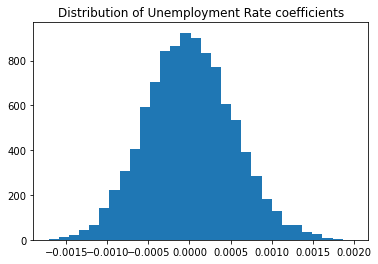

In [90]:
#figuring out percent chance that unemployment rate coefficient would result from random chance
count_rates=0
for i in rates_perm_coefs:
    if i>=1.14*10**-3:
        count_rates+=1
perc_rates=count_rates/n_perm * 100

plt.hist(rates_perm_coefs, bins=30);
plt.title("Distribution of Unemployment Rate coefficients");
print("Actual Unemployment Rate coefficient: 1.140E-03\nPercentage of coefficients equal to or greater than this: {:.2f}%".format(perc_rates))

In [54]:
covid_data.head()

,Unnamed: 0,date,country_code,continent,cumulative_pos,cumulative_dec,curr_pos,gdp_per_cap,gini_index,gini_year,population,pop_density,unemploy_rates,dec_pos_ratio,cpos_norm,cdec_norm
0,0,2021-03-13,ALB,EU,116821,2030,34970.0,5353.244856,29.0,2012,2854191.0,104.612263,11.47,0.017377,0.040930,0.000711
1,1,2021-02-15,DZA,AF,110711,2939,107772.0,3973.964072,27.6,2011,43053054.0,17.730068,11.81,0.026547,0.002572,0.000068
2,2,2021-02-15,AGO,AF,20366,492,19874.0,2790.726615,42.7,2008,31825295.0,24.713052,6.93,0.024158,0.000640,0.000015
3,3,2021-02-15,ARG,SA,2029008,50327,1978681.0,9912.281809,41.2,2017,44938712.0,16.258510,9.84,0.024804,0.045151,0.001120
4,4,2021-02-15,AUS,OC,28900,909,27991.0,55060.326100,35.8,2014,25364307.0,3.247871,5.16,0.031453,0.001139,0.000036


## Evaluation of Significance (ANOVA)

#### 1. Effect Sizes (η^2) 

Now that we have determined that GDP per capita and Gini index both have a significant effect on a country's cumulative positive rate per capita, we want to also find out each factor's effect size (η^2), or __the proportion of the total variance in the scores that can be accounted for by the treatment (i.e. the factor itself)__.

From statistics we've learned that effect size (η) = Sum of squares (A)/ (sum of squares(A) + sum of squares(Residual)), where A is the desired factor:  

In [6]:
gdp_ss=0.032799
gini_ss=0.004625
residual_ss=0.063167

η2_gdp=gdp_ss/(gdp_ss+residual_ss)
η2_gini=gini_ss/(gini_ss+residual_ss)

print('The Effect Size of GDP per Capita:{:.3f}'.format(η2_gdp))
print('The Effect Size of Gini index:{:.3f}'.format(η2_gini))


The Effect Size of GDP per Capita:0.342
The Effect Size of Gini index:0.068


The effect sizes shows that roughly 34.2% of the total variance in the cumulative positive rates per capita can be accoutned for by the differences in GDP per capita, while that proportion for Gini index is only 6.8%. Compared to Gini index, GDP per capita has a greater effect on the dependent variable.

#### 2. Visual Representation of Categorical Data 

Although it is hard to plot ANOVA results, we can instead visualize our data by graphing the means of cumulative positive cases per capita against both Gini index levels and GDP per capita levels, and compare the graphs to ANOVA results in order to get further insights. Below are two versions of the same graph idea. The first has the Gini levels on the x-axis and GDP per capita levels as different colors on the graph, while the second is the exact opposite.

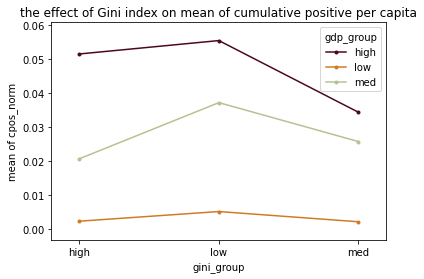

In [7]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=anova_df['gini_group'], trace=anova_df['gdp_group'], response=anova_df['cpos_norm'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.title('the effect of Gini index on mean of cumulative positive per capita')
plt.show()

This first graph above generally matches the ANOVA results: when Gini level is constant, change in GDP per Capita also does signficantly change the mean of cumulative positive cases per capita, thus proving the significant effect of GDP per capita found in ANOVA.

However, the graph also shows that within the same Gini index level, the higher GDP per capita of a country, the higher the cumulative positive cases per capita, which is rather surprising. Moreover, despite the lack of interaction effect, Gini index seem to not matter when GDP per capita level is low. Both findings are worth analyzing in the discussion.

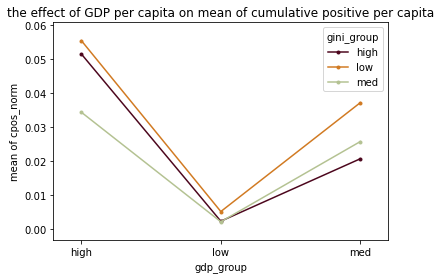

In [8]:
fig2 = interaction_plot(x=anova_df['gdp_group'], trace=anova_df['gini_group'], response=anova_df['cpos_norm'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.title('the effect of GDP per capita on mean of cumulative positive per capita')
plt.show()

This second graph is more surprising than the first one. First, the lowest Gini level yields the highest positive cases per capita within every GDP level. Second, despite ANOVA result suggests that there is no interaction, the high Gini level seems to have a stronger effect (i.e. yielding more cases per capita) when the GDP level is high, while having a weaker effect (i.e. yielding fewer cases per capita) when the GDP level is medium and low. In fact, at GDP level = low, medium and low Gini levels has the same effect on the dependent variable. Both findings are worth analyzing in the discussion.

#### 3. Tukey HSD Tests

Since the two-way ANOVA test could only tell us GDP per capita and Gini index are significant, but __not also how exactly different levels (high/med/low) of GDP per capita and Gini index affect cumulative positive rate per capita__, we decide to perform two post-hoc tests, one for each indepedent variable. And the tests are a Tukey Honestly-Significant-Difference (Tukey HSD) Tests.

The first Tukey HSD Test, for __GDP per capita__:

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD) for GDP per cap
m_comp_gdp = pairwise_tukeyhsd(endog=anova_df['cpos_norm'], groups=anova_df['gdp_group'], alpha=0.05)
m_comp_gdp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-0.0443,0.001,-0.0558,-0.0328,True
high,med,-0.0199,0.001,-0.0314,-0.0084,True
low,med,0.0244,0.001,0.0129,0.0359,True


This first Tukey HSD test returns a table that compares different pairs of GDP per capita levels (high vs. low, high vs. med, and low vs. med), and lists out each pair's mean difference (meandiff), p-value of the difference (p-adj) and the lower and upper bounds of the confidence intervals at 95% of mean difference (lower, upper). Also, it shows whether the null hypothesis that there is no sigfinicant difference between each pair's values should be rejected (reject).

P.S. We continue to adopt a significance level of 0.05. But thanks to the function's convenient "reject" column, there is no need to manually compare 0.05 to p-adj.

From this table, we can infer that there are significant differences between the means of:

high and low GDP per capita
high and medium GDP per capita
low and medium GDP per capita
Also, among the three significant differences, the mean difference between high and low GDP is the highest (-0.0443).

The second Tukey HSD Test, for __GDP per capita__:

In [11]:
m_comp_gini = pairwise_tukeyhsd(endog=anova_df['cpos_norm'], groups=anova_df['gini_group'], alpha=0.05)
m_comp_gini.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,0.0253,0.001,0.0117,0.0389,True
high,med,0.0051,0.6398,-0.0085,0.0187,False
low,med,-0.0202,0.0017,-0.0338,-0.0066,True


Similar to the Tukey HSD Test for GDP per capita, the same Test for Gini index also returns a table with the same attributes. From this table, we can infer that there are significant differences between the means of:

high and low Gini index
low and medium Gini index
There is not a significant difference between the means of:

high and medium Gini index
This lack of significant difference can be seen on the second graph in the visual representation section above (reflected by the crossing of the purple and green lines). 

Also, between the two significant differences, the mean difference between high and low Gini index is the highest (0.0253).

## Interpretation and Conclusions
#### Linear Regressions: 
Before performing a multivariable regression, we initially tried predicting the cumulative positive COVID cases per capita based on GDP per capita, Gini index, population density, and unemployment rates separately (analyses 1, 2, 3, and 4). The closer that an $r^2$ score is to 1.0, or 100%, the more significant the model would be.  The $r^2$ scores of predicting positive COVID cases based on population density and unemployment rates separately were very small (0.0006 and 0.0083, respectively).  This shows that these two predictors alone do not tell us much about cumulative COVID cases per capita.  The $r^2$ scores of predicting positive COVID cases based on GDP per capita and Gini index were 0.242 and 0.10, respectively.  These values show a low correlation, but are not completely negligible, particularly the cumulative positives vs GDP model.  Surprisingly, we found that countries with higher GDPs were more likely to have higher COVID rates.  
To assess the significance of the GDP per capita vs cumulative positive covid cases per capita, we used train test split to see if our model was overfitted.  Since the average $r^2$ value for the trained group was significantly higher than the average $r^2$ value for the test group (0.245 vs 0.195), this signifies that this model may be overfitted.

#### Multivariable Regressions:
When trying to use the GDP per capita, Gini index, unemployment rates, and population density to predict the cumulative positive cases of a country, the resulting $r^2$ score from the multivariable regression was 0.2982 (analysis 5). This is a small correlation, but still signifies a trend. 

We also tried to predict the cumulative number of deaths from COVID per capita based on the GDP per capita, Gini index, unemployment rate, and population density of countries (analysis 6), however this resulted in a lower $r^2$ score of 0.1914. Lastly, in one final multi-model, we took the same predictors to try and predict the ratio of cumulative positive cases to the cumulative number of deceased people from COVID (analysis 7).  But, the model resulted in an even lower $r^2$ score of around 0.0244. This was less significant than the both of the prior multi-models. 
Applying these results to the real-world context, it would mean that even though we may have assumed that countries with a lower GDP per capita and Gini index might have more cumulative positive cases or cumulative deceased people from COVID compared to countries with higher values, based on the multi-models these were incorrect assumptions to make. All three of the regressions performed ended up being insignificant, which showed that a country's GDP and Gini index has close to no effect on their cumulative number of COVID cases as well as deaths. 
To assess the significance of this, we used train test split to see if our model was overfitted.  Since the average $r^2$ value for the trained group was significantly higher than the average $r^2$ value for the test group (0.304 vs 0.194), this signifies that this model may be overfitted.

We used permutation testing to test the chances that the trends we found in our most robust model (analysis 5) occured by chance.  We did so by shuffling the covid positives cases, assigning random rates to countries 10,000 times and looking at the coefficients for each variable in these cases.  We found that the likelihood of getting a GDP coefficient greater than or equal to what we found, 6.376E-07, was 0%.  This means that not a single one of our random permutations produced a slope greater than or equal to this for GDP per capita.  For Gini index, 1.62% of the randomly permuted slopes were less than or equal to our actual slope of -7.082E-04.  For unemployment rates, 1.97% of the randomly permuted slopes were greater than the actual slope of 1.140E-03.  This signifies that all of these coefficients were significant and were very unlikely to have occured from chance.  For population density, there was a high likelihood of a random slope being greater than our observed slope of -4.363E-07, which means that our slope was not statistically significant.  

#### Two-Way ANOVA Test:
Through a two-way ANOVA test, we found that __both a country's GDP per capita and Gini Index cause significant difference__ on that country's cumulative positive cases per capita. Speficically, the significant effect by GDP per capita is __relatively stronger__ (F(2,126) = 32.69, p<0.05, η^2=34.2%), while the significant effect by Gini Index is __relatively weaker__ (F(2,126) = 4.61, p<0.05, η^2=6.8%). __We did not find a significant interaction effect__ between GDP per capita and Gini Index (F(4,126) = 0.45, p>0.05).

Through a Tukey HSD test, we also found that all pairwise comparisons of different levels of __GDP per capita__  result in significant mean differences of a country's cumulative positive cases per capita, specifically the __high vs. low__ (meandiff=-0.0443), __high vs. medium__ (meandiff=-0.0199), and __low vs. medium__ (meandiff=0.0244) GDP per capita pairs. For the __Gini index__ levels, only the __high vs. low__ (meanfidd=0.0253) and __low vs. medium__ (0.0051) pairs yield significant mean value differences; the __high vs. medium__ (meandiff=0.0202) pair __yields no significant mean value difference__.

Within the same Gini index level (and true to every Gini index level), the __higher the GDP per capita level__, the __higher the country's cumulative positive cases per capita__. 

Across all GDP per capita levels, the __low Gini level always yields the highest number of per capita cases__. When GDP per capita = high, the ranking of number of positive per capita cases from high to low is at low Gini > high Gini >medium Gini. When GDP per capita = medium, the ranking is at low Gini > medium Gini >high Gini. When GDP per capita =low, medium and high Gini indexes yield the same number of per capita cases.




The results come out as a surprise for us. We originally hypothesized that countries with higher GDP per capita (i.e. better economy and personal wealth) would yiled lower Covid positive cases per capita, because we assumed that  
1. people from those countries would share higher affordability of masks, sanitizers and other Covid essentials,
2. those countries usually provide better healthcare.
We also hypothesized that a combination of low Gini Index (i.e. higher equality in terms of wealth distribution) and high GDP per capita would have lower Covid positive cases per capita, assuming that 
1. this combination would mean fewer groups in poverty,
2. high Gini index alone (without medium or high GDP per capita) would probably yield higher numbers per capita due to "equal" lack of resources. 

However, the tests show just the opposite. 

First, within the same Gini level, the higher the level of GDP per capita, the higher the number of positive cases per capita. We believe that there are several factors that could possibly explain this significant effect:
1. many countries with high GDP per capita (e.g. the U.S. and Western European countries) are also the ones that run the most Covid tests and do so most frequently; this would lead to higher sample sizes per capita, which would in turn result in higher per capita positive cases.
2. many of those countries are also well-developed and have shrinking population age pyramids (i.e. has a higher percentage of elderly population; e.g. Japan). Since Covid-positive elderlies are more susceptible of developing (severe) symptoms, the percentage of those countries' Covid-positive population who feel and report symptons would naturally be higher. In other words, in low GDP per capita countries (i.e. having lower % of elderly population), there might be a higher % of asymptomatic positive cases that are never reported or tested. For our next phase, we would further explore this idea by performing statistical tests on death rates per capita vs. GDP per capita.
3. There are other external variables that may influence the results.

Second, the low Gini index countries (i.e. more unequal wealth distribution) yield the highest number of per capita cases, c.b. This main effect can also be explained by the factors above, as most countries on the bottom-third Gini index level also have low GDP per capita. This significant effect, however, is relatively weak, as indicated by both its small effect size (6.8%) and p-value (0.011). Also, it is important to note that Gini Index would only have a significant effect with the significance level = 0.05. If we were to set the level to the more conservative 0.01, from 0.011>0.01 we would have concluded that this main effect is not significant. Therefore between the two significant factors, GDP per capita––not Gini index––is the dominant factor that influences cumulative positive cases per capita.

Third, as shown by ANOVA, the fact that there is no significant interaction between GDP per capita and Gini index suggests that the strength of GDP per capita's effect does not depend on the state (level) of Gini index, and vice versa. However, the two graphs seem to contradict with this finding: the high and medium Gini index lines do cross at GDP per capita level = low. In other words, it seems that Gini index depends on the level of GDP per capita. Below are some analysis and possible reasons why such contradiction exists:
1. At GDP level = high, high Gini countries yield more cases than medium Gini countries do. This likely occurs because of two reasons: 


    1. high GDP per capita means those countries have been capable of conduct more testings (and therefore have more positive cases per capita)
    
    2. high Gini means high inequalities in wealth distribution, high percentage of low-income households and severe social conflicts. Since Covid "discriminates" against the non-privileged, the small upper- and upper-middle class (who contribute significantly to the high GDP per capita) have the resource and savings to protect themselves from covid, while the vast lowermiddle- and lower class people suffer the greatest. Take China and South Africa as examples: both countries fall in the high GDP per capita-high Gini index category and have very high per capita cases numbers.
    
    
2. As GDP per capita level decreases from high, to medium, then to low, the main effect of Gini index gradually decreases, because––as analyzed above––GDP per capita plays a bigger role of influencing the results. When GDP per capita is low, no matter how high the Gini indexes are, the fact that many of those countries are not able to provide accessible Covid testing deems the low positive cases per capita number. __This can also explain the lack of mean difference between the high and medium Gini index levels, as found by the Tukey HSD test.__


3. The contradiction between ANOVA results and the graph/Tukey HSD may be caused by the fact that there are other independent variables, not the interaction between GDP per capita and Gini index, that lead to the results. The line-crossing on the second graph could thus possibly be explained by other factors such as government policies and population density.




## Limitations
- Not all countries have reported a Gini index, GDP per capita, population, population density, or unemployment rate value, so this is not representative of the whole world.  We used 135 out of 195 countries for our analysis.
- Some countries’ values are more up-to-date than others.
- Some countries may also have low life expectancies due to many social, political and environmental factors. A country’s high COVID death rate may thus also be influenced by its low life expectancy.
- Some countries might have less accurate COVID data than others.
- Because the original dataset is updated daily, the dataset we have saved will not have all current COVID data, and may not be accurate to the present day. 
- Policy and government response likely influences COVID rates significantly, but we did not account for this in our analysis.
- Some countries may have had more testing, which could have also effected the number of reported cumulative cases/deaths.

## Source Code
All code was shared in the following Google Drive folder, in addition to having the prior project phases. 
https://drive.google.com/drive/folders/1OAunMYE2SKDuoehcmpewYIPKlBWcg3fU?usp=sharing


The data was sourced from the following sites:

Covid data source: https://github.com/ec-jrc/COVID-19/blob/master/data-of-world/jrc-covid-19-world-latest.csv  
This dataset contains COVID-19 data of each country in the world, with columns such as cumulative positive cases and hospitalizations.  

Gini index data source: https://data.worldbank.org/indicator/SI.POV.GINI/?end=2018&start=2015 
This dataset contains the Gini index for each country for which it is available.

GDP per capita data source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 
note: for this data set, we had to remove the final column (2020), which had no data in it to avoid errors.  This dataset contains the gross domestic product per capita of each country.

Population data source: https://data.worldbank.org/indicator/SP.POP.TOTL 
This dataset contains the population for each country for which it is available.

Population density data source: https://data.worldbank.org/indicator/EN.POP.DNST
This dataset contains the population density for each country for which it is available.

Unemployment rates data source: https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS
This dataset contains the unemployment rate for each country for which it is available.

Websites that provide code instructions for running ANOVA and Tukey HSD Tests in Python: https://www.scribbr.com/statistics/two-way-anova/;
https://www.statology.org/two-way-anova-python/; https://www.reneshbedre.com/blog/anova.html; https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda

One of our group members' PSYCH 2500 (a Cornell Statistics course) notes helped us understand ANOVA and Tukey HSD Tests:
https://docs.google.com/document/d/1G9PD4IQCVQ1DxbL8vmCS6QnooiXl2DRXPqPpMn5wCAk/edit

## Acknowledgements

* Code from INFO 2950 lectures inspired our code in several places, including the train test split method. 